In [1]:
from blueqat import photonqat as pq

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Photonqat

The basic gate operation and measurement are performed.

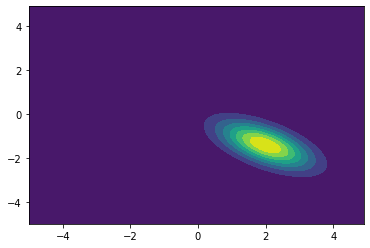

measured x = -3.0571229577960475
mu0 = [ 1.99170565 -1.41179984]
cov0 = [[ 0.79001283 -0.38079708]
 [-0.38079708  0.5       ]]


In [3]:
G = pq.Gaussian(2) # two qumode [0, 1]
G.D(0, 2) # Displacement gate, x to x+2
G.S(0, 1) # X squeeIng gate, r=1
G.R(0, np.pi/4) # pi/4 rotation gate
G.BS(0, 1, np.pi/4) # 50:50 beam splitter
G.MeasX(1) # Measure mode 1
G.run()
G.Wigner(0) # plot
print('measured x =', G.Creg(1, "x").read())
print('mu0 =', G.mean(0)) # mu of qumode 0
print('cov0 =', G.cov(0)) # covarince of qumode 1

## Method chain is available

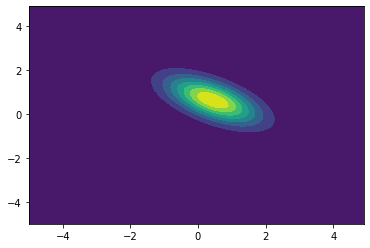

measured x = -0.38135969213006526
mu0 = [0.4396943  0.62604583]
cov0 = [[ 0.79001283 -0.38079708]
 [-0.38079708  0.5       ]]


In [4]:
G = pq.Gaussian(2).D(0, 2).S(0, 1).R(0, np.pi/4).BS(0, 1, np.pi/4)
G.MeasX(1).run()
G.Wigner(0) # plot
print('measured x =', G.Creg(1, "x").read())
print('mu0 =', G.mean(0)) # mu of qumode 0
print('cov0 =', G.cov(0)) # covarince of qumode 1

## Phase space

N bosonic mode Hilbert space  
$\otimes^{N}_{k=1} \mathcal{H}_k$

vectorial operator  
$\hat{\mathbf{b}} = (\hat{a}_1, \hat{a}_1^{\dagger}, \dots, \hat{a}_N, \hat{a}_N^{\dagger})$ : 2N elements

bosonic commutation relations  
$[\hat{b}_i, \hat{b}_j] = \Omega_{ij}\ \ (i, j = 1, \dots, 2N)$ 

$\mathbf{\Omega} = \oplus_{k=1}^{N}\omega\ \ \ 
\omega = 
\begin{pmatrix}
0 & 1 \\
-1 & 0 \\
\end{pmatrix}
$

Quadrature field  
$\hat{\mathbf{x}} = (\hat{q}_1, \hat{p}_1, \dots, \hat{q}_N, \hat{p}_N)$ : 2N elements

canonical commutation relation  
$[\hat{x}_i, \hat{x}_j] = 2i\Omega_{ij}\ \ (i, j = 1, \dots, 2N)$ 

## Density operator and Wigner function

Weyl operator  
$D(\xi) = \exp(i \hat{x}^T \Omega \hat{\xi})$  

Below is the Wigner characteristic function
$\chi (\xi) = \mathrm{Tr}[\hat{\rho}D(\xi)]$

The Fourier transform of the Wigner characteristic function is the Wigner function
$W(\mathbf{x}) = \int_{R^{2N}} \frac{d^{2N}}{(2\pi)^{2N}} \exp{(-i \hat{x}^T \Omega \hat{\xi})} \chi (\xi)$

## Statistics and Wigner functions

Wigner function can also be defined by statistics

- first moment  
$\bar{\mathbf{x}} = \langle \hat{\mathbf{x}} \rangle= \mathrm{Tr}[\hat{\mathbf{x}} \hat{\rho}]$

- second moment  
$V_{ij} = \frac{1}{2}\langle \{\Delta\hat{x}_i, \Delta\hat{x}_j \}\rangle$  
$\{ A, B \} = AB+BA$

$V_{ii}$ represents the dispersion of $\hat{x}_i$.

Gaussian state can be fully described with only the first 2 moments.

## Gaussian Unitary

In Quadrature operator, Gaussian Unitary can be written in Affien map!
$(\mathbf{S}, \mathbf{d}) : \hat{\mathrm{x}}\to \mathbf{S}\mathrm{x} + \mathbf{d}$

Williamson's Theorem  
Any even-dimensional positive-definite matrix can be diagonalized with a simplectic transform.
$\mathbf{V} = \mathbf{SV}^{\oplus}\mathbf{S}^{T}$  
$\mathbf{V}^{\oplus} = \oplus^{N}_{k=1} \nu_k \mathbf{I}$

## Gaussian Measurement  

POVM: $\Pi_i = E_{i}^{\dagger}E_i\ \ \ (\sum_i E_{i}^{\dagger}E_i = I)$  
Replace this with a continuous quantity.

Gaussian Measurement is performed for Gaussian state, the output result is Gaussian Distribution, and the mode that was not measured remains Gaussian state.

Let the subsystem $\mathbf{B}$ to be measured and $\mathbf{A}$ be the other subsystems.

Probability distribution of measurement results: Gaussian Wigner distribution that marginalizes quadrature phases other than the measurement mode
State after measurement: It becomes as follows.

$\mathbf{V} = \mathbf{A} - \mathbf{C}(\mathbf{\Pi B \Pi})^{-1}\mathbf{C}^T$  
$\mathbf{\Pi} = \rm{diag}(1, 0)$     ($\hat{x}$ for measurement)

$\mathbf{\Pi B \Pi}$ is irregular. Use pseudo-inverse.  
$(\mathbf{\Pi B \Pi})^{-1} = B_{11}^{-1}\Pi$

This is basically the same as taking the conditional distribution of a multivariate Gaussian distribution.
Therefore, the average of the state after measurement can be obtained in the same way.

$\mathbf{\mu} = \mathbf{\mu_A} - \mathbf{C}(\mathbf{\Pi B \Pi})^{-1}(\mathbf{\mu_B} - x_B\mathbf{\Pi})$